##Question A

**1.** \\
*Step 1*: Assign first color to the first vertex. 

*Step 2*: For remaining vertices  

                  assign colors

*Step 3*: Consider a vertex. For ( each of the adjacent vertices)

        if(The color is unavailable)
        Find the first available color 
        Assign the color 

*Step 4*: Repeat for remaining vertices.


The time complexity of the above algorithm is:

**2.**  No,the above algorithm is not the optimal solution. It doesn't use the minimum number of colors always.

*Upper bound* :The degree of a graph is the maximum number of vertices that can be attached to a single vertex.  Let d be the maximum degree of the given graph. As per the pseudo code, first we color a vertex, then at most d vertices could be there ==> atmost d colors have been used. Hence, the total number of colors used will be the initial vertex+d . Therefore, there is an upper bound of (d+1) colors. 

**3.** If we visit the vertices in the descending order of their degree, then we will first colore the vertex which has highest degree. Hence, we will be first eliminating the vertex which has highest number of conflicts. This usually performs better than just coloring the vertices with no particular order.

**4.**  
(a)Consider a M x M doku puzzle which contains non-overlapping rectangular cells . Each non-overlapping rectangular cell contains M squares.

(b) Number all the boxes in the M x M doku puzzle from 1 to $M^2$. 

(c) In the graph , consider $M^2$ vertices where each vertex is being numbered corresponding the to the M x M doku puzzle.

(d) Consider first box which is numbered as '1'. Join this vertex to all the vertices whose numbers are in the same row, same column and in the same non-overlapping rectangular cell as '1'.

(e) Repeat this for all the vertices.

(f) Apply graph coloring problem.

##Question B

***1.***

In [1]:
from networkx.exception import NetworkXError
import random
import itertools
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

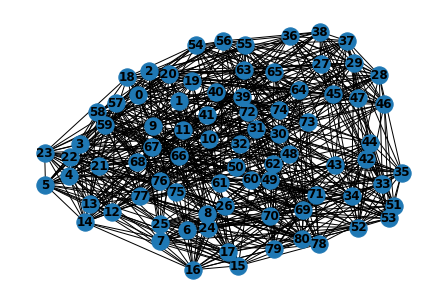

In [4]:
y=nx.sudoku_graph(3)
plt.figure()
nx.draw(y, with_labels=True, font_weight='bold')
plt.show()  

***2.***



In [5]:
class Node : 
    
    def __init__(self, idx, data = 0) : # Constructor   
        """
        id : Integer (1, 2, 3, ...)
        """
        self.id = idx
        self.data = data
        self.connectedTo = dict()

    def addNeighbour(self, neighbour , weight = 0) :
        """
        neighbour : Node Object
        weight : Default Value = 0
        adds the neightbour_id : wt pair into the dictionary
        """
        if neighbour.id not in self.connectedTo.keys() :  
            self.connectedTo[neighbour.id] = weight

    # setter
    def setData(self, data) : 
        self.data = data 

    #getter
    def getConnections(self) : 
        return self.connectedTo.keys()

    def getID(self) : 
        return self.id
    
    def getData(self) : 
        return self.data

    def getWeight(self, neighbour) : 
        return self.connectedTo[neighbour.id]

    def __str__(self) : 
        return str(self.data) + " Connected to : "+ \
         str([x.data for x in self.connectedTo])

class Graph : 

    totalV = 0 # total vertices in the graph
    
    def __init__(self) : 
        """
        allNodes = Dictionary (key:value)
                   idx : Node Object
        """
        self.allNodes = dict()

    def addNode(self, idx) : 
        """ adds the node """
        if idx in self.allNodes : 
            return None
        
        Graph.totalV += 1
        node = Node(idx=idx)
        self.allNodes[idx] = node
        return node

    def addNodeData(self, idx, data) : 
        """ set node data acc to idx """
        if idx in self.allNodes : 
            node = self.allNodes[idx]
            node.setData(data)
        else : 
            print("No ID to add the data.")

    def addEdge(self, src, dst, wt = 0) : 
        """
        Adds edge between 2 nodes
        Undirected graph
        src = node_id = edge starts from
        dst = node_id = edge ends at
        To make it a directed graph comment the second line
        """
        self.allNodes[src].addNeighbour(self.allNodes[dst], wt)
        self.allNodes[dst].addNeighbour(self.allNodes[src], wt)
    
    def isNeighbour(self, u, v) : 
        """
        check neighbour exists or not
        """
        if u >=1 and u <= 81 and v >=1 and v<= 81 and u !=v : 
            if v in self.allNodes[u].getConnections() : 
                return True
        return False



    def printEdges(self) : 
        """ print all edges """
        for idx in self.allNodes :
            node =  self.allNodes[idx]
            for con in node.getConnections() : 
                print(node.getID(), " --> ", 
                self.allNodes[con].getID())
    
    # getter
    def getNode(self, idx) : 
        if idx in self.allNodes : 
            return self.allNodes[idx]
        return None

    def getAllNodesIds(self) : 
        return self.allNodes.keys()

    # methods
    def DFS(self, start) :
        """
        start is an id of the start node
        """ 
        # STACK
        visited = [False]*Graph.totalV

        if start in self.allNodes.keys() : 
            self.__DFSUtility(node_id = start, visited=visited) 
        else : 
            print("Start Node not found")

    def __DFSUtility(self, node_id, visited) : 
        visited = self.__setVisitedTrue(visited=visited, node_id=node_id)
        #print
        print(self.allNodes[node_id].getID(), end = " ")

        #Recursive Stack
        for i in self.allNodes[node_id].getConnections() : 
            if visited[self.allNodes[i].getID()] == False : 
                self.__DFSUtility(node_id = self.allNodes[i].getID(), 
                visited=visited)

    def BFS(self, start) : 
        """
        start is an id of the start node
        """
        #Queue
        visited = [False]*Graph.totalV

        if start in self.allNodes.keys() : 
            self.__BFSUtility(node_id = start, visited=visited) 
        else : 
            print("Start Node not found")

    def __BFSUtility(self, node_id, visited) :
        queue = []
        visited = self.__setVisitedTrue(visited=visited, node_id=node_id)

        queue.append(node_id)

        while queue != [] : 
            x = queue.pop(0) 
            #print
            print(self.allNodes[x].getID(), end = " ")

            for i in self.allNodes[x].getConnections() : 
                idx = self.allNodes[i].getID()
                if visited[idx]  == False : 
                    queue.append(idx)
                    visited = self.__setVisitedTrue(visited=visited,
                     node_id=idx)
        


    def __setVisitedTrue(self, visited, node_id) : 
        """
        Utility function for BFS and DFS 
        
        Through this function we will set visited[id] = True
        Preprocessing node_id if required
        Since now node_id is an integer it is not required to preprocess it
        """
        visited[node_id] = True
        return visited


In [6]:


class SudokuConnections : 
    def __init__(self) :  # constructor

        self.graph = Graph() # Graph Object

        self.rows = 9
        self.cols = 9
        self.total_blocks = self.rows*self.cols #81

        self.__generateGraph() # Generates all the nodes
        self.connectEdges() # connects all the nodes acc to sudoku constraints

        self.allIds = self.graph.getAllNodesIds() # storing all the ids in a list

        

    def __generateGraph(self) : 
        """
        Generates nodes with id from 1 to 81.
        Both inclusive
        """
        for idx in range(1, self.total_blocks+1) : 
            _ = self.graph.addNode(idx)

    def connectEdges(self) : 
        """
        Connect nodes according to Sudoku Constraints : 
        # ROWS
       from start of each id number connect all the 
       successive numbers till you reach a multiple of 9
        # COLS (add 9 (+9))
        from start of id number. +9 for each connection
        till you reach a number >= 73 and <= 81
        # BLOCKS
        Connect all the elements in the block which do not 
        come in the same column or row.
        1   2   3
        10  11  12
        19  20  21
        1 -> 11, 12, 20, 21
        2 -> 10, 19, 12, 21
        3 -> 10, 11, 19, 20 
        Similarly for 10, 11, 12, 19, 20, 21.
        """
        matrix = self.__getGridMatrix()

        head_connections = dict() # head : connections

        for row in range(9) :
            for col in range(9) : 
                
                head = matrix[row][col] #id of the node
                connections = self.__whatToConnect(matrix, row, col)
                
                head_connections[head] = connections
        # connect all the edges

        self.__connectThose(head_connections=head_connections)
        
    def __connectThose(self, head_connections) : 
        for head in head_connections.keys() : #head is the start idx
            connections = head_connections[head]
            for key in connections :  #get list of all the connections
                for v in connections[key] : 
                    self.graph.addEdge(src=head, dst=v)

 
    def __whatToConnect(self, matrix, rows, cols) :

        """
        matrix : stores the id of each node representing each cell
        returns dictionary
        connections - dictionary
        rows : [all the ids in the rows]
        cols : [all the ids in the cols]
        blocks : [all the ids in the block]
        
        ** to be connected to the head.
        """
        connections = dict()

        row = []
        col = []
        block = []

        # ROWS
        for c in range(cols+1, 9) : 
            row.append(matrix[rows][c])
        
        connections["rows"] = row

        # COLS 
        for r in range(rows+1, 9):
            col.append(matrix[r][cols])
        
        connections["cols"] = col

        # BLOCKS
        
        if rows%3 == 0 : 

            if cols%3 == 0 :
                
                block.append(matrix[rows+1][cols+1])
                block.append(matrix[rows+1][cols+2])
                block.append(matrix[rows+2][cols+1])
                block.append(matrix[rows+2][cols+2])

            elif cols%3 == 1 :
                
                block.append(matrix[rows+1][cols-1])
                block.append(matrix[rows+1][cols+1])
                block.append(matrix[rows+2][cols-1])
                block.append(matrix[rows+2][cols+1])
                
            elif cols%3 == 2 :
                
                block.append(matrix[rows+1][cols-2])
                block.append(matrix[rows+1][cols-1])
                block.append(matrix[rows+2][cols-2])
                block.append(matrix[rows+2][cols-1])

        elif rows%3 == 1 :
            
            if cols%3 == 0 :
                
                block.append(matrix[rows-1][cols+1])
                block.append(matrix[rows-1][cols+2])
                block.append(matrix[rows+1][cols+1])
                block.append(matrix[rows+1][cols+2])

            elif cols%3 == 1 :
                
                block.append(matrix[rows-1][cols-1])
                block.append(matrix[rows-1][cols+1])
                block.append(matrix[rows+1][cols-1])
                block.append(matrix[rows+1][cols+1])
                
            elif cols%3 == 2 :
                
                block.append(matrix[rows-1][cols-2])
                block.append(matrix[rows-1][cols-1])
                block.append(matrix[rows+1][cols-2])
                block.append(matrix[rows+1][cols-1])

        elif rows%3 == 2 :
            
            if cols%3 == 0 :
                
                block.append(matrix[rows-2][cols+1])
                block.append(matrix[rows-2][cols+2])
                block.append(matrix[rows-1][cols+1])
                block.append(matrix[rows-1][cols+2])

            elif cols%3 == 1 :
                
                block.append(matrix[rows-2][cols-1])
                block.append(matrix[rows-2][cols+1])
                block.append(matrix[rows-1][cols-1])
                block.append(matrix[rows-1][cols+1])
                
            elif cols%3 == 2 :
                
                block.append(matrix[rows-2][cols-2])
                block.append(matrix[rows-2][cols-1])
                block.append(matrix[rows-1][cols-2])
                block.append(matrix[rows-1][cols-1])
        
        connections["blocks"] = block
        return connections

    def __getGridMatrix(self) : 
        """
        Generates the 9x9 grid or matrix consisting of node ids.
        
        This matrix will act as amapper of each cell with each node 
        through node ids
        """
        matrix = [[0 for cols in range(self.cols)] 
        for rows in range(self.rows)]

        count = 1
        for rows in range(9) :
            for cols in range(9):
                matrix[rows][cols] = count
                count+=1
        return matrix


In [9]:
class SudokuBoard : 
    def __init__(self) : 

        self.board = self.getBoard()
        
        self.sudokuGraph = SudokuConnections()
        self.mappedGrid = self.__getMappedMatrix() # Maps all the ids to the position in the matrix

    def __getMappedMatrix(self) : 
        matrix = [[0 for cols in range(9)] 
        for rows in range(9)]

        count = 1
        for rows in range(9) : 
            for cols in range(9):
                matrix[rows][cols] = count
                count+=1
        return matrix

    def getBoard(self) : 

        board = [
            [4,6,2,1,0,0,0,0,0],
            [0,0,3,0,0,4,7,0,8],
            [5,0,0,0,9,2,0,4,0],
            [0,0,4,0,1,0,0,8,2],
            [0,0,6,9,0,3,5,0,0],
            [1,9,0,0,4,0,6,0,0],
            [0,2,0,6,3,0,0,0,9],
            [7,0,1,8,0,0,2,0,0],
            [0,0,0,0,0,7,8,5,1]
        ]
        return board

    def printBoard(self) : 
        
        print("    1 2 3     4 5 6     7 8 9")
        for i in range(len(self.board)) : 
            if i%3 == 0  :#and i != 0:
                print("  - - - - - - - - - - - - - - ")

            for j in range(len(self.board[i])) : 
                if j %3 == 0 :#and j != 0 : 
                    print(" |  ", end = "")
                if j == 8 :
                    print(self.board[i][j]," | ", i+1)
                else : 
                    print(f"{ self.board[i][j] } ", end="")
        print("  - - - - - - - - - - - - - - ")

    def is_Blank(self) : 
        
        for row in range(len(self.board)) :
            for col in range(len(self.board[row])) : 
                if self.board[row][col] == 0 : 
                    return (row, col)
        return None

    def graphColoringInitializeColor(self):
        """
        fill the already given colors
        """
        color = [0] * (self.sudokuGraph.graph.totalV+1)
        given = [] # list of all the ids whos value is already given. Thus cannot be changed
        for row in range(len(self.board)) : 
            for col in range(len(self.board[row])) : 
                if self.board[row][col] != 0 : 
                    #first get the idx of the position
                    idx = self.mappedGrid[row][col]
                    #update the color
                    color[idx] = self.board[row][col] # this is the main imp part
                    given.append(idx)
        return color, given

    def solveGraphColoring(self, m =9) : 
        
        color, given = self.graphColoringInitializeColor()
        if self.__graphColorUtility(m =m, color=color, v =1, given=given) is None :
            print(":(")
            return False
        count = 1
        for row in range(9) : 
            for col in range(9) :
                self.board[row][col] = color[count]
                count += 1
        return color
    
    def __graphColorUtility(self, m, color, v, given) :
        
        if v == self.sudokuGraph.graph.totalV+1  : 
            return True
        for c in range(1, m+1) : 
            if self.__isSafe2Color(v, color, c, given) == True :
                color[v] = c
                if self.__graphColorUtility(m, color, v+1, given) : 
                    return True
            if v not in given : 
                color[v] = 0

    def __isSafe2Color(self, v, color, c, given) : 
        
        if v in given and color[v] == c: 
            return True
        elif v in given : 
            return False

        for i in range(1, self.sudokuGraph.graph.totalV+1) :
            if color[i] == c and self.sudokuGraph.graph.isNeighbour(v, i) :
                return False
        return True

In [10]:
    s = SudokuBoard()
    print("EASY LEVEL:")
    print("\n\n")
    print("BEFORE SOLVING ...")
    print("\n\n")
    s.printBoard()
    print("\nSolving ...")
    print("\n\n\nAFTER SOLVING ...")
    print("\n\n")
    s.solveGraphColoring(m=9)
    s.printBoard()

EASY LEVEL:



BEFORE SOLVING ...



    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  4 6 2  |  1 0 0  |  0 0 0  |  1
 |  0 0 3  |  0 0 4  |  7 0 8  |  2
 |  5 0 0  |  0 9 2  |  0 4 0  |  3
  - - - - - - - - - - - - - - 
 |  0 0 4  |  0 1 0  |  0 8 2  |  4
 |  0 0 6  |  9 0 3  |  5 0 0  |  5
 |  1 9 0  |  0 4 0  |  6 0 0  |  6
  - - - - - - - - - - - - - - 
 |  0 2 0  |  6 3 0  |  0 0 9  |  7
 |  7 0 1  |  8 0 0  |  2 0 0  |  8
 |  0 0 0  |  0 0 7  |  8 5 1  |  9
  - - - - - - - - - - - - - - 

Solving ...



AFTER SOLVING ...



    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  4 6 2  |  1 7 8  |  3 9 5  |  1
 |  9 1 3  |  5 6 4  |  7 2 8  |  2
 |  5 8 7  |  3 9 2  |  1 4 6  |  3
  - - - - - - - - - - - - - - 
 |  3 5 4  |  7 1 6  |  9 8 2  |  4
 |  2 7 6  |  9 8 3  |  5 1 4  |  5
 |  1 9 8  |  2 4 5  |  6 3 7  |  6
  - - - - - - - - - - - - - - 
 |  8 2 5  |  6 3 1  |  4 7 9  |  7
 |  7 4 1  |  8 5 9  |  2 6 3  |  8
 |  6 3 9  |  4 2 7  |  8 5 1  |  9
 

In [8]:
    s = SudokuBoard()
    print("TOUGH LEVEL:")
    print("\n\n")
    print("BEFORE SOLVING ...")
    print("\n\n")
    s.printBoard()
    print("\nSolving ...")
    print("\n\n\nAFTER SOLVING ...")
    print("\n\n")
    s.solveGraphColoring(m=9)
    s.printBoard()

TOUGH LEVEL:



BEFORE SOLVING ...



    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  0 0 0  |  7 0 3  |  0 0 0  |  1
 |  3 0 9  |  0 0 0  |  0 0 0  |  2
 |  0 1 4  |  0 0 5  |  0 0 0  |  3
  - - - - - - - - - - - - - - 
 |  1 0 0  |  0 0 0  |  0 8 0  |  4
 |  0 9 0  |  0 4 0  |  0 5 0  |  5
 |  0 2 0  |  0 0 0  |  0 0 4  |  6
  - - - - - - - - - - - - - - 
 |  0 0 0  |  9 0 0  |  3 2 0  |  7
 |  0 0 0  |  0 5 0  |  6 0 9  |  8
 |  0 0 0  |  2 0 1  |  0 0 0  |  9
  - - - - - - - - - - - - - - 

Solving ...



AFTER SOLVING ...



    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  2 5 6  |  7 1 3  |  4 9 8  |  1
 |  3 7 9  |  4 2 8  |  5 6 1  |  2
 |  8 1 4  |  6 9 5  |  2 7 3  |  3
  - - - - - - - - - - - - - - 
 |  1 4 3  |  5 7 2  |  9 8 6  |  4
 |  7 9 8  |  3 4 6  |  1 5 2  |  5
 |  6 2 5  |  1 8 9  |  7 3 4  |  6
  - - - - - - - - - - - - - - 
 |  5 8 1  |  9 6 4  |  3 2 7  |  7
 |  4 3 2  |  8 5 7  |  6 1 9  |  8
 |  9 6 7  |  2 3 1  |  8 4 5  |  9


##Question C

In [11]:
!pip3 install networkx==2.6.2
!pip install decorator==4.3
!conda install -c anaconda decorator==4.3

     |████████████████████████████████| 1.9 MB 5.1 MB/s 
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2


/bin/bash: conda: command not found


In [12]:
import numpy 
import random
import itertools
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

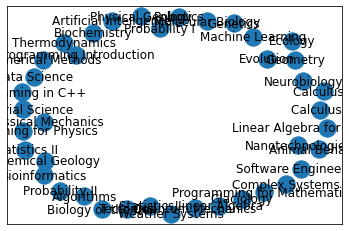

In [14]:
student_data = pd.read_csv("/content/synthetic_school_enrollment_data.csv")
student_data.rename( columns={'Unnamed: 0':'Name'}, inplace=True )
name_list = list(student_data['Name'])
student_data.set_index("Name", inplace = True)
courses = list(student_data.columns)[2:]
class_network = nx.Graph()
class_network.add_nodes_from(courses)
nx.draw_networkx(class_network, with_labels=True)

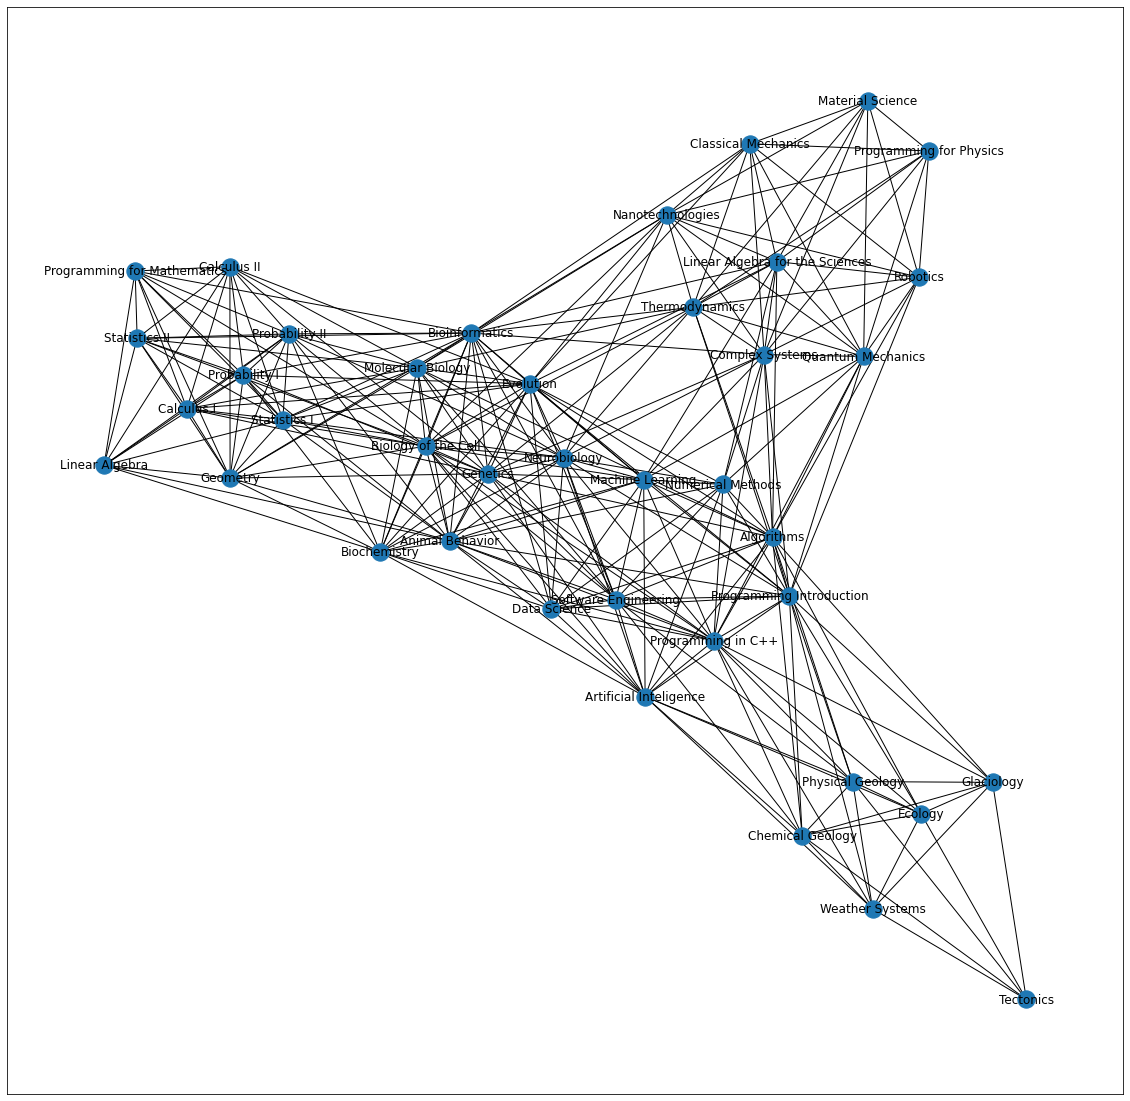

In [15]:
without_subj = student_data.drop(["Major", "Minor"], axis=1) # We don’t need major and minor for the moment
without_subj = without_subj.T # transpose
list_of_overlaps = []
for student in name_list:
    list_of_overlaps.append(list(without_subj.loc[without_subj[student]].index))

for sublist in list_of_overlaps:
    for pair in itertools.combinations(sublist, 2):
          class_network.add_edge(pair[0], pair[1])

n_edges_total = len(list(class_network.edges))
n_nodes = len(list(class_network.nodes))
n_edges_possible = (n_nodes*(n_nodes-1))/2
ig = plt.figure(figsize=(20,20))
nx.draw_networkx(class_network, with_labels=True)

In [16]:
colors = [
"lightcoral", "gray", "lightgray", "firebrick", "red", "chocolate", "darkorange", "moccasin", "gold", "yellow", "darkolivegreen", "chartreuse", "forestgreen", "lime", "mediumaquamarine", "turquoise", "teal", "cadetblue", "dogerblue", "blue", "slateblue", "blueviolet", "magenta", "lightsteelblue"]

from datetime import datetime
dates = []
calendar = {}
for i in list(range(14,20)):
    for j in list(range(10,18,2)):
        date = datetime(2021, 6, i, j, 0)
        dates.append(date)
        calendar[date] = []

from_color_to_date = {col: dates[i] for i, col in enumerate(colors)}

In [17]:
def greedy_coloring_algorithm(network, colors):
    nodes = list(network.nodes()) 
    random.shuffle(nodes) # step 1 random ordering
    for node in nodes:
        dict_neighbors = dict(network[node])# gives names of nodes that are neighbors
        nodes_neighbors = list(dict_neighbors.keys())
        
        forbidden_colors = []
        for neighbor in nodes_neighbors:
            #example.nodes.data()[1]
            #len(example.nodes.data()[1].keys())
            if len(network.nodes.data()[neighbor].keys()) == 0: 
                # if the neighbor has no color, proceed
                continue
            else:
                # if the neighbor has a color,
                # this color is forbidden
                #example.nodes.data()[1]['color']
                forbidden_color = network.nodes.data()[neighbor]
                forbidden_color = forbidden_color['color']                
                forbidden_colors.append(forbidden_color)        # assign the first color 
        # that is not forbidden
        for color in colors:
            # step 2: start everytime at the top of the colors,
            # so that the smallest number of colors is used
            if color in forbidden_colors:
                continue
            else:
                # step 3: color one node at the time
                network.nodes[node]['color'] = color
                break

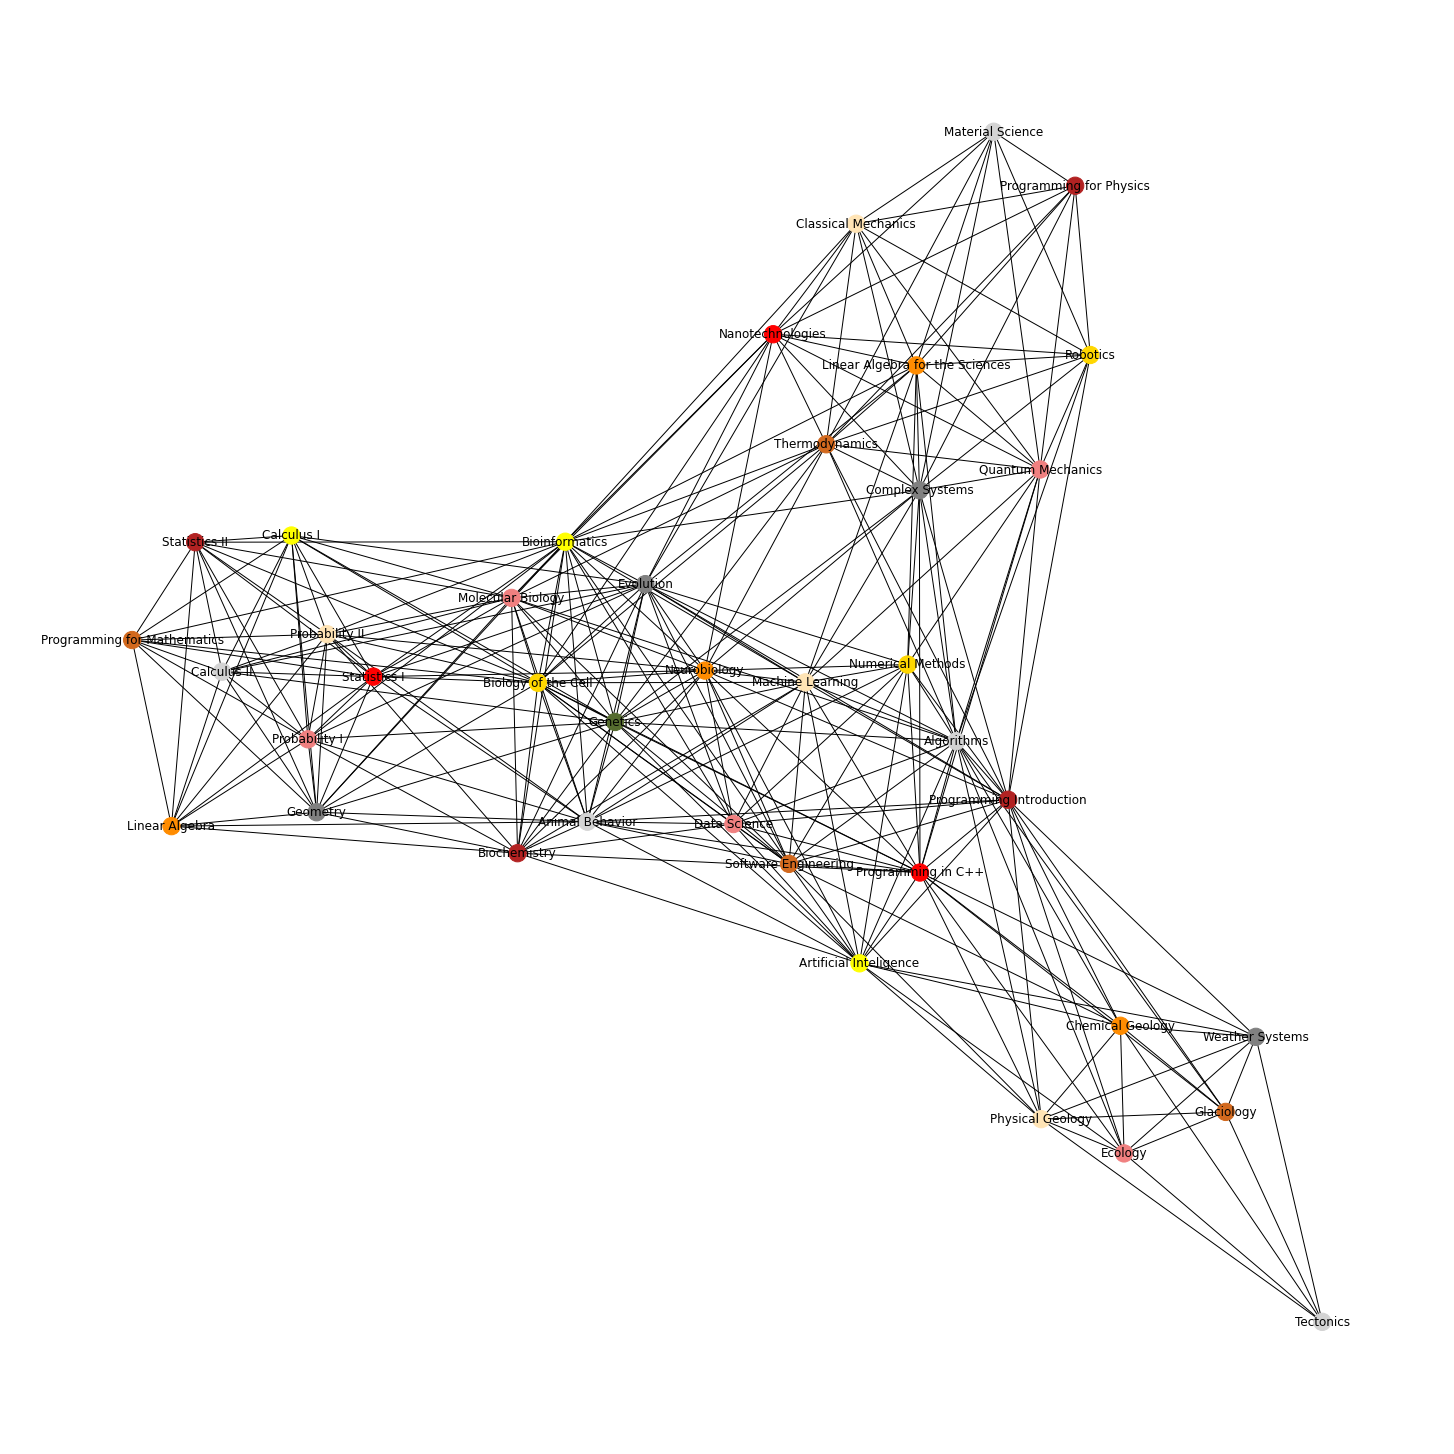

In [18]:
greedy_coloring_algorithm(class_network, colors)
colors_nodes = [data["color"] for v, data in class_network.nodes(data=True)]
fig = plt.figure(figsize=(20,20))
nx.draw(class_network, node_color=colors_nodes, with_labels=True)

In [19]:
number = []
for i in list(range(0,50)):
    greedy_coloring_algorithm(class_network, colors)
    colors_nodes = [data['color'] for v, data in class_network.nodes(data=True)]
    num_col = len(set(colors_nodes))
    number.append(num_col)

In [20]:
for v, data in class_network.nodes(data=True):
    calendar[from_color_to_date[data['color']]].append(v)
    
max_number_exams_sync = len(max(list(calendar.values()),key=len))
rooms = ["Room "+str(i) for i in list(range(max_number_exams_sync))]
final = pd.DataFrame.from_dict(calendar, orient='index', columns=rooms)

final

,Room 0,Room 1,Room 2,Room 3,Room 4
2021-06-14 10:00:00,Molecular Biology,Quantum Mechanics,Probability I,Data Science,Ecology
2021-06-14 12:00:00,Evolution,Complex Systems,Geometry,Weather Systems,None
2021-06-14 14:00:00,Animal Behavior,Material Science,Calculus II,Algorithms,Tectonics
2021-06-14 16:00:00,Biochemistry,Programming for Physics,Statistics II,Programming Introduction,None
2021-06-15 10:00:00,Nanotechnologies,Statistics I,Programming in C++,None,None
2021-06-15 12:00:00,Thermodynamics,Programming for Mathematics,Software Engineering,Glaciology,None
2021-06-15 14:00:00,Neurobiology,Linear Algebra for the Sciences,Linear Algebra,Chemical Geology,None
2021-06-15 16:00:00,Classical Mechanics,Probability II,Machine Learning,Physical Geology,None
2021-06-16 10:00:00,Biology of the Cell,Robotics,Numerical Methods,None,None
2021-06-16 12:00:00,Bioinformatics,Calculus I,Artificial Inteligence,None,None
